In [8]:
#to working with data import libraries
import numpy as np
import pandas as pd
#to visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [21]:
#for processing import packages
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
#to remove warning messages
import warnings
warnings.filterwarnings("ignore")

In [24]:
#load dataset using pandas
df = pd.read_csv("C:/Users/Akshay/ML_Algorithms_project_ICTA/humidity-prediction/dataset/weather-history.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [25]:
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [41]:
df['Apparent Temperature (C)']

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

In [27]:
#to verify the null value
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [28]:
#checking na value
df.isna().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [29]:
#checking data types 
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [30]:
print(df.describe())

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


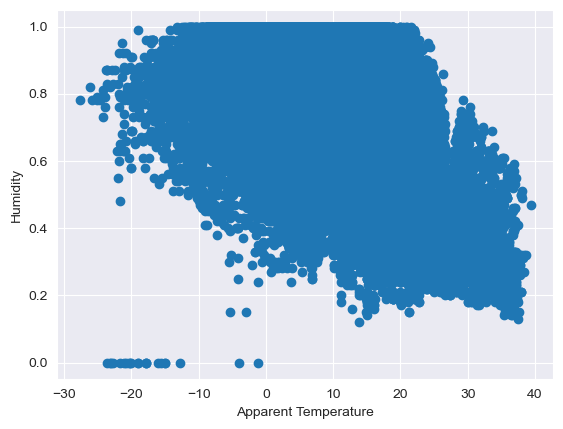

In [63]:
# Step 2: Explore the dataset
# Example: scatter plot of humidity vs. Apparent Temperature (C
import matplotlib.pyplot as plt

plt.scatter(df['Apparent Temperature (C)'], df['Humidity'])
plt.xlabel('Apparent Temperature')
plt.ylabel('Humidity')
plt.show()



In [64]:
# Step 3: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Apparent Temperature (C)'], df['Humidity'], test_size=0.2)

In [65]:
# Step 4: Prepare the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

In [66]:
# Step 5: Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.024288860919478104
Root Mean Squared Error: 0.15584883996834273
R-squared: 0.36337959557091026


In [68]:
# Step 7: Predict the humidity
new_data = pd.DataFrame({'Apparent Temperature (C)': [20, 25, 30]})
new_data_scaled = scaler.transform(new_data.values.reshape(-1, 1))
new_humidity = model.predict(new_data_scaled)
print('Predicted humidity:', new_humidity)

Predicted humidity: [0.63391038 0.57889054 0.52387069]


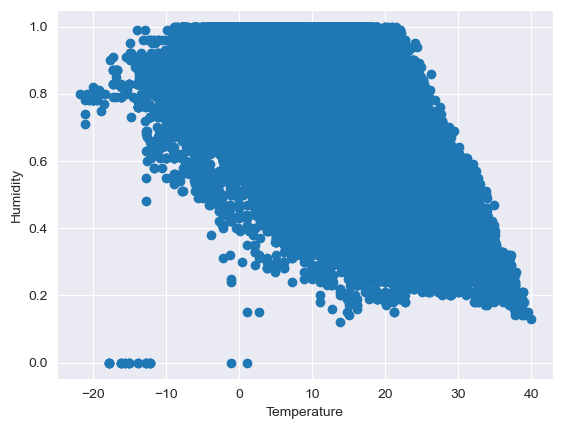

In [69]:
 # Step 2: Explore the dataset
# Example: scatter plot of humidity vs.Temperature (C)
import matplotlib.pyplot as plt

plt.scatter(df['Temperature (C)'], df['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

In [70]:
# Step 3: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Temperature (C)'], df['Humidity'], test_size=0.2)

In [71]:
# Step 4: Prepare the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

In [72]:
# Step 5: Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.022947752344442657
Root Mean Squared Error: 0.15148515552503042
R-squared: 0.3967178382655362


In [74]:
# Step 7: Predict the humidity
new_data = pd.DataFrame({'Temperature (C)': [20, 25, 30]})
new_data_scaled = scaler.transform(new_data.values.reshape(-1, 1))
new_humidity = model.predict(new_data_scaled)
print('Predicted humidity:', new_humidity)

Predicted humidity: [0.63081085 0.5661169  0.50142294]


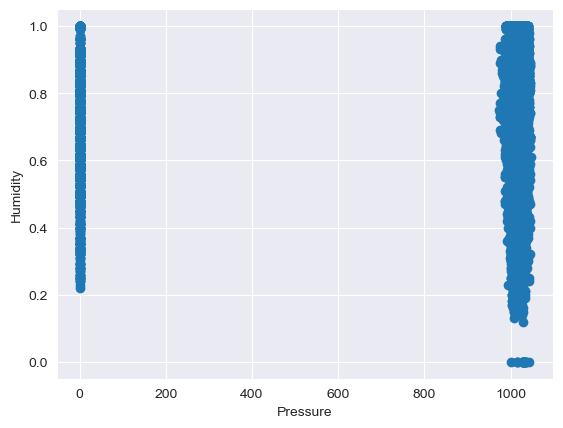

In [75]:
# Step 2: Explore the dataset
# Example: scatter plot of humidity vs.Pressure (millibars)
import matplotlib.pyplot as plt

plt.scatter(df['Pressure (millibars)'], df['Humidity'])
plt.xlabel('Pressure')
plt.ylabel('Humidity')
plt.show()
 

In [76]:
# Step 3: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Pressure (millibars)'], df['Humidity'], test_size=0.2)

In [77]:
# Step 4: Prepare the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

In [78]:
# Step 5: Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.038476611209383345
Root Mean Squared Error: 0.19615455949170119
R-squared: 4.110401668322439e-05


In [80]:
# Step 7: Predict the humidity
new_data = pd.DataFrame({'Pressure (millibars)': [20, 25, 30]})
new_data_scaled = scaler.transform(new_data.values.reshape(-1, 1))
new_humidity = model.predict(new_data_scaled)
print('Predicted humidity:', new_humidity)

Predicted humidity: [0.72649662 0.72653889 0.72658116]
